In [1]:
from google.colab import files
uploaded = files.upload()

import io
import numpy as np
import pandas as pd

Saving student_feedback.xlsx to student_feedback.xlsx


In [2]:
filename = next(iter(uploaded))
df = pd.read_excel(io.BytesIO(uploaded[filename]), sheet_name=0)


df = df.drop(columns=["Unnamed: 0"], errors="ignore")


dummy_comments = [
    "Great course, learned a lot!",
    "The teacher explains well.",
    "Assignments are too hard.",
    "Loved the presentations.",
    "Sometimes explanations are confusing.",
    "Very supportive teacher.",
    "Course structure could be better.",
    "I would recommend this course.",
    "Not very helpful.",
    "Best subject ever!"
]
np.random.seed(42)
df["Feedback comments"] = np.random.choice(dummy_comments, size=len(df))


rating_cols = [
    "Well versed with the subject",
    "Explains concepts in an understandable way",
    "Use of presentations",
    "Degree of difficulty of assignments",
    "Solves doubts willingly",
    "Structuring of the course",
    "Provides support for students going above and beyond",
    "Course recommendation based on relevance"
]
for col in rating_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce").clip(1, 10)


print("Shape:", df.shape)
print("Missing values in rating columns:\n", df[rating_cols].isna().sum())
print(df.head())


clean_path = "clean_student_feedback.csv"
df.to_csv(clean_path, index=False)
files.download(clean_path)


Shape: (1001, 10)
Missing values in rating columns:
 Well versed with the subject                            0
Explains concepts in an understandable way              0
Use of presentations                                    0
Degree of difficulty of assignments                     0
Solves doubts willingly                                 0
Structuring of the course                               0
Provides support for students going above and beyond    0
Course recommendation based on relevance                0
dtype: int64
   Student ID  Well versed with the subject  \
0         340                             5   
1         253                             6   
2         680                             7   
3         806                             9   
4         632                             8   

   Explains concepts in an understandable way  Use of presentations  \
0                                           2                     7   
1                                           5

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Average scores:
 Well versed with the subject                            7.497502
Explains concepts in an understandable way              6.081918
Use of presentations                                    5.942058
Degree of difficulty of assignments                     5.430569
Solves doubts willingly                                 5.474525
Structuring of the course                               5.636364
Provides support for students going above and beyond    5.662338
Course recommendation based on relevance                5.598402
dtype: float64

Minimum scores:
 Well versed with the subject                            5
Explains concepts in an understandable way              2
Use of presentations                                    4
Degree of difficulty of assignments                     1
Solves doubts willingly                                 1
Structuring of the course                               1
Provides support for students going above and beyond    1
Course recommendation ba

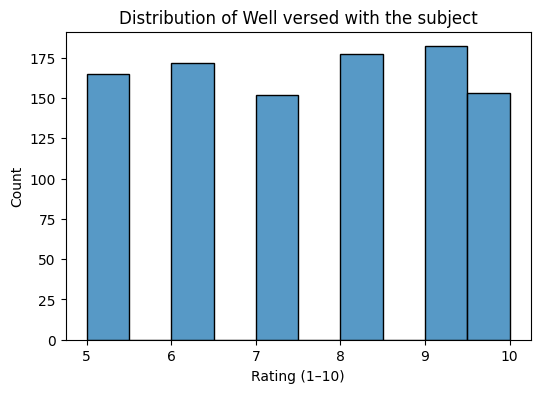

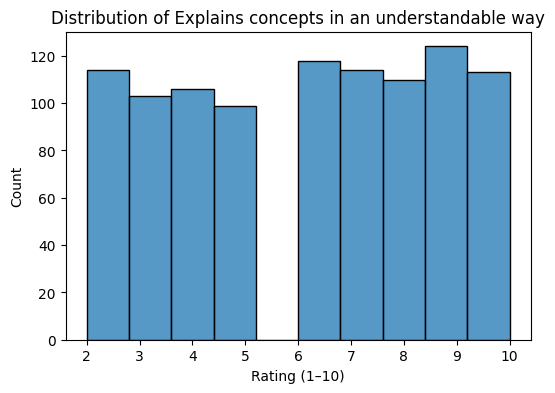

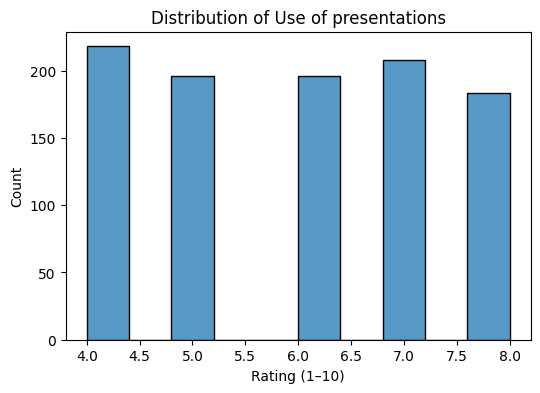

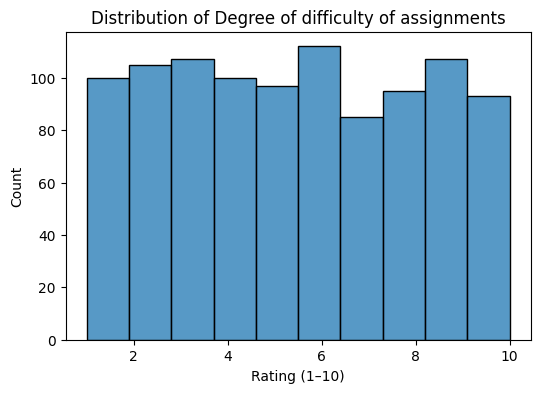

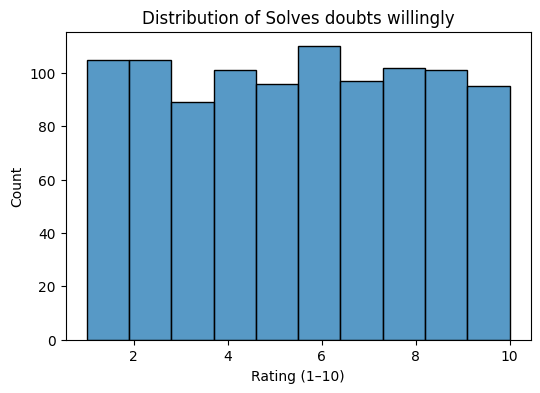

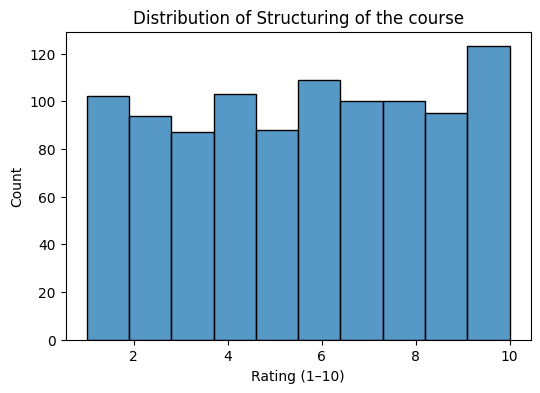

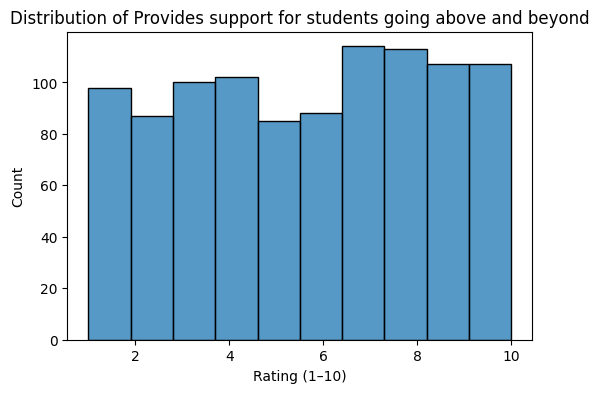

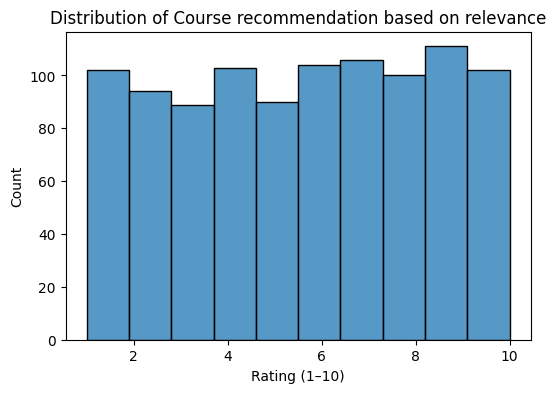

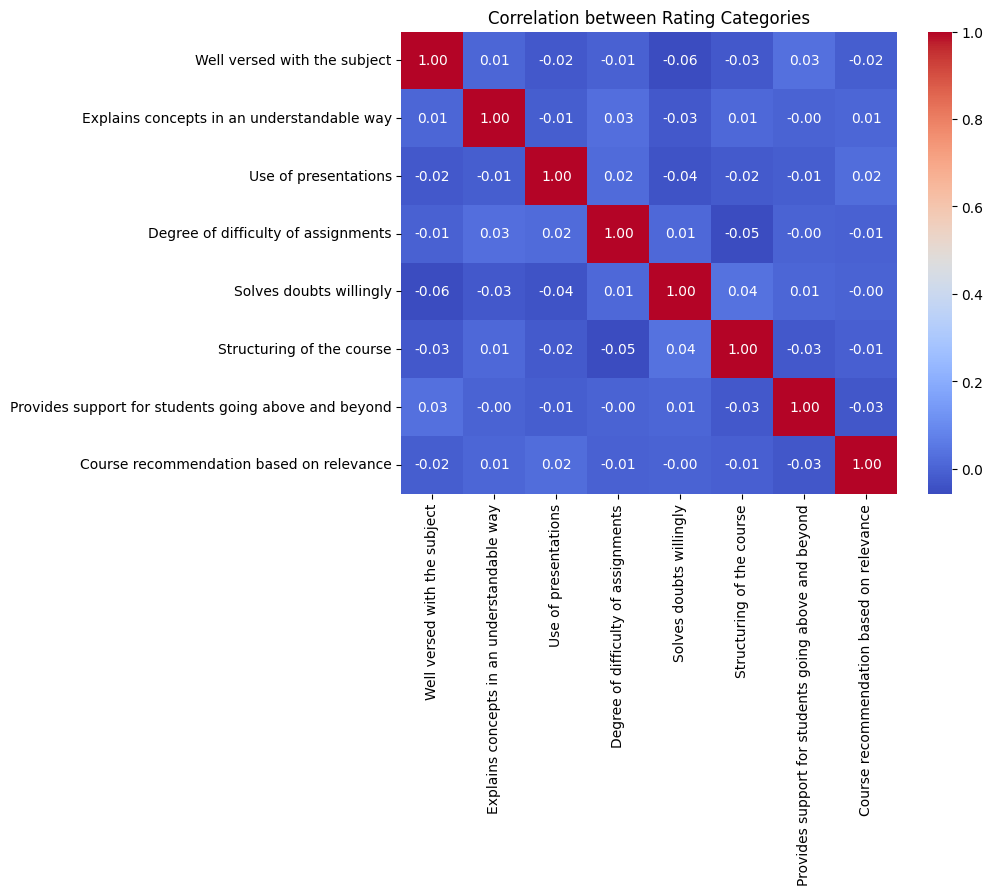

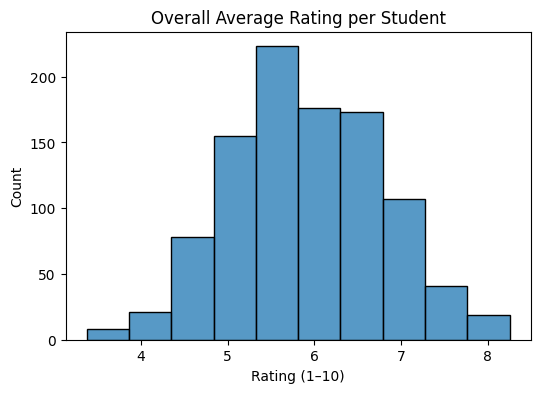

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("clean_student_feedback.csv")


rating_cols = [
    "Well versed with the subject",
    "Explains concepts in an understandable way",
    "Use of presentations",
    "Degree of difficulty of assignments",
    "Solves doubts willingly",
    "Structuring of the course",
    "Provides support for students going above and beyond",
    "Course recommendation based on relevance"
]


print("Average scores:\n", df[rating_cols].mean())
print("\nMinimum scores:\n", df[rating_cols].min())
print("\nMaximum scores:\n", df[rating_cols].max())


for col in rating_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=10, kde=False)
    plt.title(f"Distribution of {col}")
    plt.xlabel("Rating (1–10)")
    plt.ylabel("Count")
    plt.show()


plt.figure(figsize=(8,6))
sns.heatmap(df[rating_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between Rating Categories")
plt.show()


df["Overall Average"] = df[rating_cols].mean(axis=1)
plt.figure(figsize=(6,4))
sns.histplot(df["Overall Average"], bins=10, kde=False)
plt.title("Overall Average Rating per Student")
plt.xlabel("Rating (1–10)")
plt.ylabel("Count")
plt.show()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 8.3 MB/s eta 0:00:00
Sentiment
Positive    693
Negative    308
Name: count, dtype: int64


/tmp/ipython-input-1981783837.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Sentiment", data=df, palette="coolwarm")


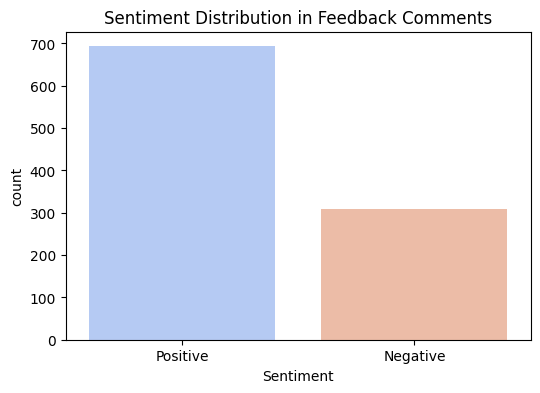

In [4]:
!pip install vaderSentiment

import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("clean_student_feedback.csv")


analyzer = SentimentIntensityAnalyzer()


def get_sentiment(text):
    score = analyzer.polarity_scores(str(text))["compound"]
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"


df["Sentiment"] = df["Feedback comments"].apply(get_sentiment)


sentiment_counts = df["Sentiment"].value_counts()
print(sentiment_counts)

plt.figure(figsize=(6,4))
sns.countplot(x="Sentiment", data=df, palette="coolwarm")
plt.title("Sentiment Distribution in Feedback Comments")
plt.show()


df.to_csv("student_feedback_with_sentiment.csv", index=False)


=== Average Ratings ===
 Well versed with the subject                            7.497502
Explains concepts in an understandable way              6.081918
Use of presentations                                    5.942058
Provides support for students going above and beyond    5.662338
Structuring of the course                               5.636364
Course recommendation based on relevance                5.598402
Solves doubts willingly                                 5.474525
Degree of difficulty of assignments                     5.430569
dtype: float64


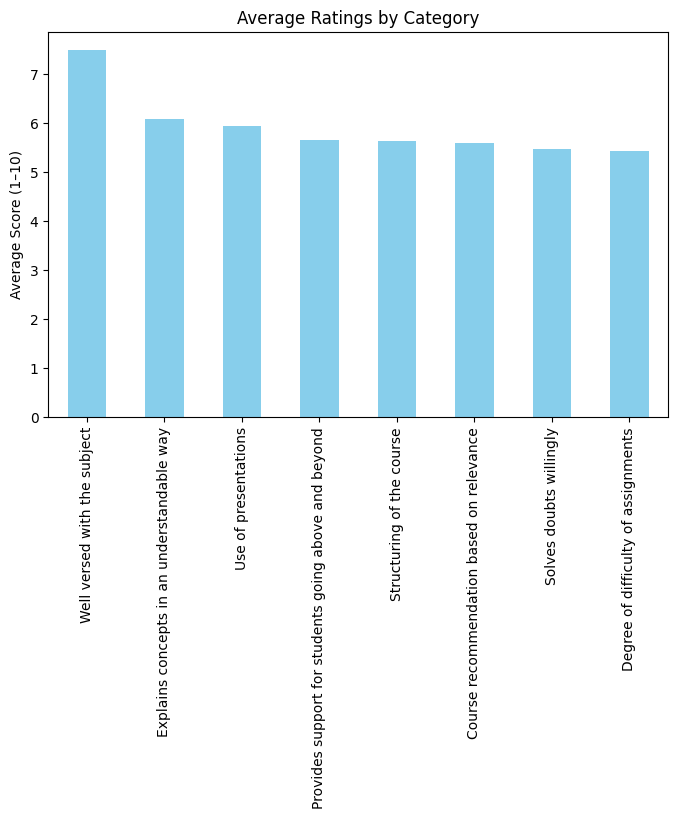


=== Sentiment Distribution ===
 Sentiment
Positive    693
Negative    308
Name: count, dtype: int64


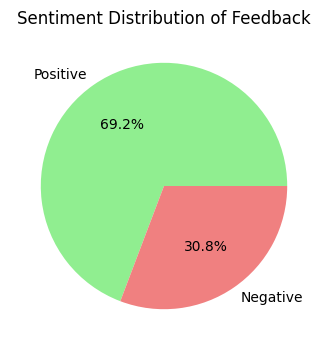


=== Recommendations ===
1. Focus on improving 'Degree of difficulty of assignments' as it has the lowest score.
2. Address common complaints found in negative feedback to reduce dissatisfaction.
3. Maintain strong performance in 'Well versed with the subject' since it has the highest rating.


In [5]:
import matplotlib.pyplot as plt


avg_ratings = df[rating_cols].mean().sort_values(ascending=False)
print("=== Average Ratings ===\n", avg_ratings)


plt.figure(figsize=(8,5))
avg_ratings.plot(kind="bar", color="skyblue")
plt.title("Average Ratings by Category")
plt.ylabel("Average Score (1–10)")
plt.show()


print("\n=== Sentiment Distribution ===\n", df["Sentiment"].value_counts())

plt.figure(figsize=(5,4))
df["Sentiment"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=["lightgreen","lightcoral","lightgrey"])
plt.title("Sentiment Distribution of Feedback")
plt.ylabel("")
plt.show()

recommendations = []
if avg_ratings.min() < 6:
    low_area = avg_ratings.idxmin()
    recommendations.append(f"Focus on improving '{low_area}' as it has the lowest score.")
if df['Sentiment'].value_counts().get("Negative",0) > 200:
    recommendations.append("Address common complaints found in negative feedback to reduce dissatisfaction.")
if avg_ratings.max() > 7:
    high_area = avg_ratings.idxmax()
    recommendations.append(f"Maintain strong performance in '{high_area}' since it has the highest rating.")

print("\n=== Recommendations ===")
for i, rec in enumerate(recommendations,1):
    print(f"{i}. {rec}")


In [6]:
from google.colab import files
files.download("student_feedback_with_sentiment.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>